<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/BuySell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing needed libraries

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [13]:
stock_price_df = pd.read_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv')
#print(stock_price_df['AMZN'].head())
#print(stock_price_df['AMZN'].tail())


df = pd.DataFrame()
df['AMZN'] = stock_price_df['AMZN'].values
df = df.dropna()
df

,AMZN
0,753.669983
1,757.179993
2,780.450012
3,795.989990
4,796.919983
...,...
1071,3279.389893
1072,3299.300049
1073,3372.199951
1074,3379.389893


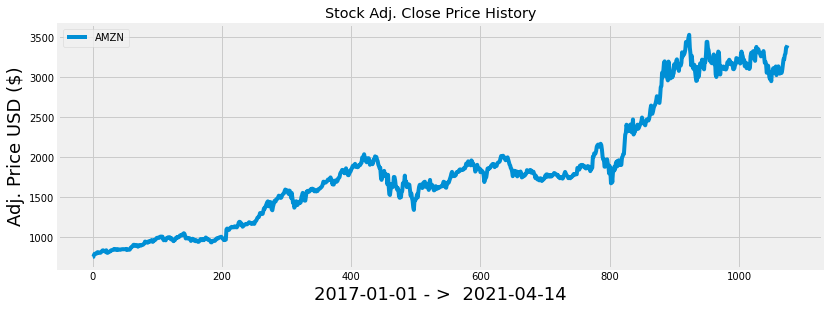

In [16]:
# Visually Show The Stock/Portfolio Price(s)
# Create the title 
title = 'Stock Adj. Close Price History    '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
plt.title(title)
plt.xlabel('2017-01-01 - >  2021-04-14',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [17]:
#Create the 30 day simple moving average
SMA30 = df.rolling(window=30).mean()
SMA30

,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1071,3092.361003
1072,3097.020003
1073,3107.521338
1074,3117.070003


In [18]:
#Create the 100 day simple moving average
SMA100 = df.rolling(window=100).mean()
SMA100

,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1071,3173.561089
1072,3175.180190
1073,3177.799390
1074,3180.305188


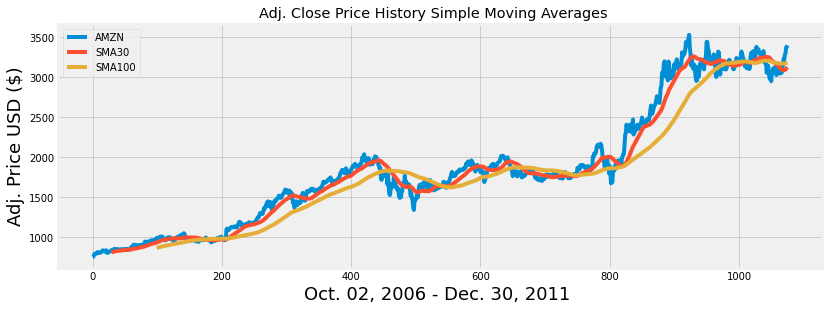

In [21]:
# Visually Show The Stock and The Moving Averages
# Create the title 
title = 'Adj. Close Price History Simple Moving Averages   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( my_stocks['AMZN'],  label='AMZN')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( SMA30['AMZN'],  label='SMA30')
plt.plot( SMA100['AMZN'],  label='SMA100')
  
plt.title(title)
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011 ',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [26]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if sma30 > sma100  then buy else sell
      if signal['SMA30'][i] > signal['SMA100'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['AMZN'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('Buy')
      elif signal['SMA30'][i] < signal['SMA100'][i]:
        if flag != 0:
          sigPriceSell.append(signal['AMZN'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('sell')
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [27]:
#Create a new dataframe
signal = pd.DataFrame(index=df['AMZN'].index)
signal['AMZN'] = df['AMZN']
signal['SMA30'] = SMA30['AMZN']
signal['SMA100'] = SMA100['AMZN']

In [28]:
signal

,AMZN,SMA30,SMA100
0,753.669983,NaN,NaN
1,757.179993,NaN,NaN
2,780.450012,NaN,NaN
3,795.989990,NaN,NaN
4,796.919983,NaN,NaN
...,...,...,...
1071,3279.389893,3092.361003,3173.561089
1072,3299.300049,3097.020003,3175.180190
1073,3372.199951,3107.521338,3177.799390
1074,3379.389893,3117.070003,3180.305188


In [29]:
x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] = x[1]

In [30]:
signal


,AMZN,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,753.669983,NaN,NaN,NaN,NaN
1,757.179993,NaN,NaN,NaN,NaN
2,780.450012,NaN,NaN,NaN,NaN
3,795.989990,NaN,NaN,NaN,NaN
4,796.919983,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1071,3279.389893,3092.361003,3173.561089,NaN,NaN
1072,3299.300049,3097.020003,3175.180190,NaN,NaN
1073,3372.199951,3107.521338,3177.799390,NaN,NaN
1074,3379.389893,3117.070003,3180.305188,NaN,NaN


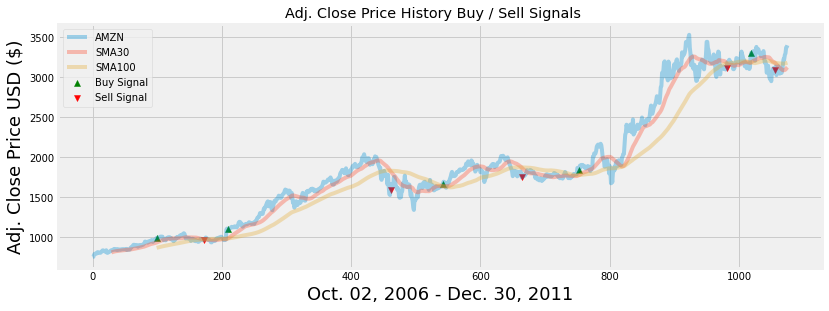

In [43]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Adj. Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = signal
ticker = 'AMZN'
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks[ticker],  label=ticker, alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( my_stocks['SMA30'],  label='SMA30', alpha = 0.35)
plt.plot( my_stocks['SMA100'],  label='SMA100', alpha = 0.35)
plt.title(title)
plt.xlabel('Oct. 02, 2006 - Dec. 30, 2011',fontsize=18)
plt.ylabel('Adj. Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [51]:
def buy_and_sell(stock_price):
    max_profit_val, current_max_val = 0, 0 
    for price in reversed(stock_price):                       
        current_max_val = max(current_max_val, price)          
        potential_profit = current_max_val - price          
        max_profit_val = max(potential_profit, max_profit_val)

    return max_profit_val


AMZN = list(df["AMZN"])

last30 = AMZN[-30:]
print(buy_and_sell(last30))

448.050048828125


In [53]:
last30

[3094.530029296875,
 3005.0,
 2977.570068359375,
 3000.4599609375,
 2951.949951171875,
 3062.85009765625,
 3057.639892578125,
 3113.590087890625,
 3089.489990234375,
 3081.679931640625,
 3091.860107421875,
 3135.72998046875,
 3027.989990234375,
 3074.9599609375,
 3110.8701171875,
 3137.5,
 3087.070068359375,
 3046.260009765625,
 3052.030029296875,
 3075.72998046875,
 3055.2900390625,
 3094.080078125,
 3161.0,
 3226.72998046875,
 3223.820068359375,
 3279.389892578125,
 3299.300048828125,
 3372.199951171875,
 3379.389892578125,
 3400.0]

MFI 
Money Flow Index (MFI)


In [56]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 5.5MB 7.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=6b87d97b2f21ae4df1a90bc13e064e15e8b6fe2fec6e19d8d2c86e73e530a330
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp37-none-any.whl size=15192 sha256=fd555bdb17889645e3c571b223746a6f86f8e7990866e42465c3d717b86d3b13
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [112]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
company = 'SNAP'
startDate = "2019-01-01"

endDate = "2021-04-20"
dataframe = yf.download(company, 
                      start=startDate, 
                      end=endDate, 
                      progress=False)

dataframe

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,5.380000,5.870000,5.350000,5.790000,5.790000,15253400
2019-01-03,5.670000,5.870000,5.630000,5.680000,5.680000,16429200
2019-01-04,5.670000,5.990000,5.630000,5.950000,5.950000,18200400
2019-01-07,6.000000,6.210000,5.920000,6.210000,6.210000,14726200
2019-01-08,6.300000,6.450000,6.210000,6.400000,6.400000,16035400
...,...,...,...,...,...,...
2021-04-13,63.480000,63.639999,61.459999,62.439999,62.439999,8829200
2021-04-14,64.010002,65.860001,61.730000,62.009998,62.009998,20883200
2021-04-15,62.509998,64.769997,61.610001,63.889999,63.889999,15303300


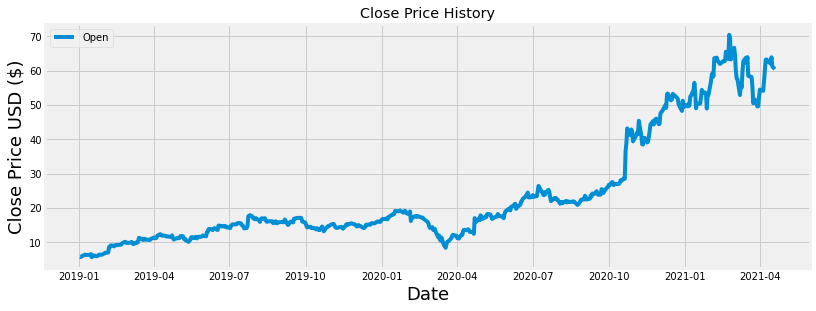

In [113]:
#Visually Show The Stock Price
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( dataframe['Close'],  label='Close Price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)  
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(dataframe.columns.values, loc='upper left')
plt.show()

In [114]:
#Calculate the typical price
typical_price = (dataframe['Close'] + dataframe['High'] + dataframe['Low']) / 3
typical_price

Date
2019-01-02     5.670000
2019-01-03     5.726667
2019-01-04     5.856667
2019-01-07     6.113333
2019-01-08     6.353333
                ...    
2021-04-13    62.513332
2021-04-14    63.199999
2021-04-15    63.423332
2021-04-16    61.715000
2021-04-19    59.730000
Length: 578, dtype: float64

In [115]:
period =  14 #The typical period used for MFI is 14 days


In [116]:
#Calculate the money flow
money_flow = typical_price * dataframe['Volume']
money_flow

Date
2019-01-02    8.648678e+07
2019-01-03    9.408455e+07
2019-01-04    1.065937e+08
2019-01-07    9.002617e+07
2019-01-08    1.018782e+08
                  ...     
2021-04-13    5.519427e+08
2021-04-14    1.319818e+09
2021-04-15    9.705863e+08
2021-04-16    1.217476e+09
2021-04-19    1.025857e+09
Length: 578, dtype: float64

In [117]:
#Get all of the positive and negative money flows 
#where the current typical price is higher than the previous day's typical price, we will append that days money flow to a positive list
#and where the current typical price is lower than the previous day's typical price, we will append that days money flow to a negative list
#and set any other value to 0 to be used when summing
positive_flow =[] #Create a empty list called positive flow
negative_flow = [] #Create a empty list called negative flow
#Loop through the typical price 
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]: #if the present typical price is greater than yesterdays typical price
    positive_flow.append(money_flow[i-1])# Then append money flow at position i-1 to the positive flow list
    negative_flow.append(0) #Append 0 to the negative flow list
  elif typical_price[i] < typical_price[i-1]:#if the present typical price is less than yesterdays typical price
    negative_flow.append(money_flow[i-1])# Then append money flow at position i-1 to negative flow list
    positive_flow.append(0)#Append 0 to the positive flow list
  else: #Append 0 if the present typical price is equal to yesterdays typical price
    positive_flow.append(0)
    negative_flow.append(0)


In [118]:
#Get all of the positive and negative money flows within the time period
positive_mf =[]
negative_mf = [] 
#Get all of the positive money flows within the time period
for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+1-period : i+1]))
#Get all of the negative money flows within the time period  
for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+1-period : i+1]))

In [119]:
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf)  + np.array(negative_mf) ))
mfi

array([70.64902243, 70.52768995, 70.55160773, 64.22366272, 63.9707111 ,
       69.19510061, 67.85100428, 68.4128621 , 61.60250639, 65.05747683,
       73.60933803, 42.14275988, 46.81752799, 56.2700987 , 53.24379348,
       56.13510499, 58.44124721, 56.35238024, 57.29381643, 58.31233822,
       59.07620763, 59.53785784, 63.51561295, 64.80788585, 58.37761439,
       72.85601345, 70.9020054 , 63.0503203 , 71.24088107, 64.38980396,
       57.23055263, 57.66615678, 57.2125052 , 57.22882388, 56.7060492 ,
       56.11112803, 63.14418623, 49.48160564, 49.87604767, 55.85349368,
       56.35267898, 61.26055626, 54.73949042, 59.0516038 , 60.16593313,
       65.88902473, 65.54766104, 64.90347774, 58.97601795, 59.94155574,
       50.70710846, 66.90844914, 79.87893011, 66.42314428, 58.55757961,
       62.5433723 , 63.27884895, 59.07388252, 58.82227608, 59.93310918,
       56.40434475, 51.2663294 , 56.94019506, 45.95655254, 34.55420342,
       37.01783715, 32.2304052 , 33.93280268, 38.41671143, 30.32

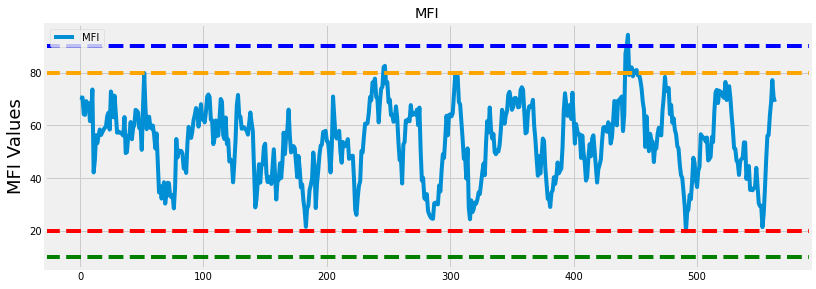

In [120]:
# Visually Show The Money Flow Index
df2 = pd.DataFrame()
df2['MFI'] = mfi
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df2['MFI'],  label='MFI')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.axhline(10, linestyle='--', color = 'green')  #Over Sold line (Buy)
plt.axhline(20, linestyle='--',color = 'red')  #Over Sold Line (Buy)
plt.axhline(80, linestyle='--', color = 'orange')  #Over Bought line (Sell)
plt.axhline(90, linestyle='--', color = 'blue')  #Over Bought line (Sell)
plt.title('MFI')
plt.ylabel('MFI Values',fontsize=18)
plt.legend(df2.columns.values, loc='upper left')
plt.show()

In [111]:
""

''